In [197]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore") 

In [198]:
left_df = pd.read_csv('left_dataset.csv')
right_df = pd.read_csv('right_dataset.csv')

In [199]:
left_df.columns

Index(['entity_id', 'name', 'address', 'city', 'state', 'postal_code',
       'categories'],
      dtype='object')

In [200]:
right_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'zip_code', 'size'], dtype='object')

In [201]:
# Remove any unnecessary columns that won't be used for matching
left_on = left_df[['entity_id', 'name', 'address', 'city', 'state', 'postal_code']]
right_on = right_df[['business_id', 'name', 'address', 'city', 'state', 'zip_code']]

In [202]:
left_on.info()
right_on.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94585 entries, 0 to 94584
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   entity_id    94585 non-null  int64  
 1   name         94585 non-null  object 
 2   address      91787 non-null  object 
 3   city         94585 non-null  object 
 4   state        94585 non-null  object 
 5   postal_code  94548 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91791 entries, 0 to 91790
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  91791 non-null  int64 
 1   name         91791 non-null  object
 2   address      91791 non-null  object
 3   city         91791 non-null  object
 4   state        91791 non-null  object
 5   zip_code     91791 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.2+ MB


In [203]:
# Remove any rows with missing or null values in the address columns
left_on.dropna(subset=['address','postal_code'], inplace=True)

# Reset the index of the dataframes after dropping rows
left_on.reset_index(drop=True, inplace=True)

In [204]:
# Convert the 'postal code' column in left_on from float to integer
left_on['postal_code'] = left_on['postal_code'].astype(int)

# Extract the first 5 characters in the 'zip_code' column
right_on['zip_code'] = right_on['zip_code'].str[:5]

# Convert the 'zip_code' column in right_on from string to integer
right_on['zip_code'] = right_on['zip_code'].astype(int)

# Rename the 'zip_code' column to 'postal_code'
right_on = right_on.rename(columns={'zip_code': 'postal_code'})

In [205]:
left_on.head()

,entity_id,name,address,city,state,postal_code
0,1,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123
1,2,St Honore Pastries,935 Race St,Philadelphia,PA,19107
2,3,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054
3,4,Sonic Drive-In,615 S Main St,Ashland City,TN,37015
4,5,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144


In [206]:
right_on.head()

,business_id,name,address,city,state,postal_code
0,1,SOURINI PAINTING INC.,12800 44th St N,Clearwater,FL,33762
1,2,WOLFF DOLLA BILL LLC,1905 E 19th Ave,Tampa,FL,33605
2,3,"COMPREHENSIVE SURGERY CENTER, LLC","1988 GULF TO BAY BLVD, Ste 1",CLEARWATER,FL,33765
3,4,FRANK & ADAM APPAREL LLC,13640 Wright Cir,Tampa,FL,33626
4,5,MORENO PLUS TRANSPORT INC,8608 Huron Court unite 58,Tampa,FL,33614


In [207]:
# Capitalizing the first letter of each word in "city" column
left_on['city'] = left_on['city'].str.title()
right_on['city'] = right_on['city'].str.title()

In [208]:
left_on.head()

,entity_id,name,address,city,state,postal_code
0,1,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123
1,2,St Honore Pastries,935 Race St,Philadelphia,PA,19107
2,3,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054
3,4,Sonic Drive-In,615 S Main St,Ashland City,TN,37015
4,5,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144


In [209]:
right_on.head()

,business_id,name,address,city,state,postal_code
0,1,SOURINI PAINTING INC.,12800 44th St N,Clearwater,FL,33762
1,2,WOLFF DOLLA BILL LLC,1905 E 19th Ave,Tampa,FL,33605
2,3,"COMPREHENSIVE SURGERY CENTER, LLC","1988 GULF TO BAY BLVD, Ste 1",Clearwater,FL,33765
3,4,FRANK & ADAM APPAREL LLC,13640 Wright Cir,Tampa,FL,33626
4,5,MORENO PLUS TRANSPORT INC,8608 Huron Court unite 58,Tampa,FL,33614


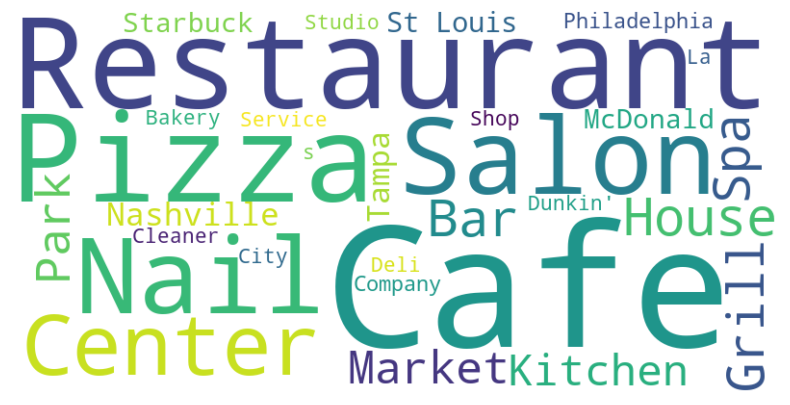

In [210]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

words = ' '.join(left_on['name'].tolist())
wordcloud = WordCloud(width=800, height=400, max_words=30, background_color='white').generate(words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [211]:
words = ' '.join(left_on['name'].tolist())

# Count the occurrences of each word
word_freq = Counter(words.split())

# Find the most frequent word
most_frequent_word = [word for word, _ in word_freq.most_common(50)]

print(most_frequent_word)

['&', 'The', '-', 'Pizza', 'and', 'Restaurant', 'Bar', 'of', 'Center', 'Cafe', 'Grill', 'Spa', 'Salon', 'Auto', 'Nails', 'House', 'Shop', 'Care', 'Market', 'Tampa', 'Service', 'Park', 'Nail', 'Store', 'Inn', 'Hair', 'City', 'Nashville', 'Kitchen', 'Dental', 'by', 'Car', 'Company', 'A', 'Family', 'Hospital', 'Mexican', 'Fitness', 'at', 'Studio', 'King', 'Repair', 'Club', 'Philadelphia', 'Coffee', 'St.', 'Cleaners', 'Louis', 'La', 'Express']


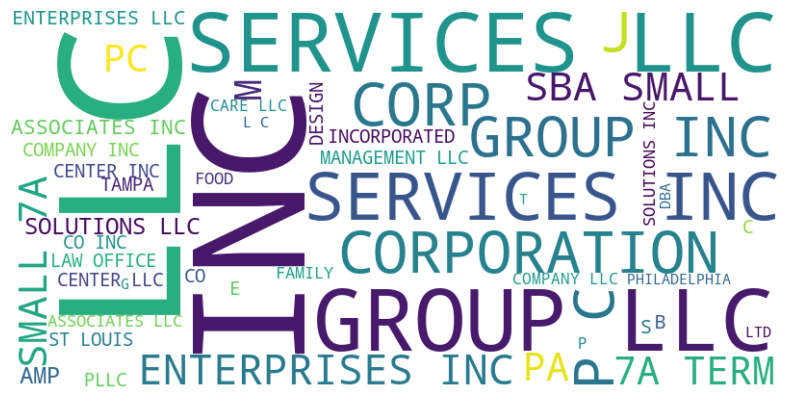

In [212]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

words = ' '.join(right_on['name'].tolist())
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

use the nltk to write a def preprocess_text(text) to remove stop words, puncuation, and create a list of exclude words including: llc, inc, group, pc, pa, 

In [213]:
words = ' '.join(right_on['name'].tolist())

# Count the occurrences of each word
word_freq = Counter(words.split())

# Find the most frequent word
most_frequent_word = [word for word, _ in word_freq.most_common(50) ]

print(most_frequent_word)

['LLC', 'INC', 'INC.', '&', 'OF', 'AND', 'THE', 'SERVICES', 'GROUP', 'CENTER', 'PC', 'PA', 'LAW', 'COMPANY', 'CARE', 'CHURCH', 'ASSOCIATES', 'ENTERPRISES', 'MANAGEMENT', 'CONSTRUCTION', 'AUTO', 'CORPORATION', 'A', 'HOME', 'SOLUTIONS', 'SERVICE', 'TAMPA', 'DBA', 'P.A.', 'CORP', 'GROUP,', 'SERVICES,', 'INSURANCE', 'SMALL', 'FAMILY', 'DENTAL', 'J', 'TERM', '7A', 'P.C.', 'PLLC', 'HEALTH', 'CO', 'DESIGN', '&AMP;', 'M', 'CONSULTING', 'SALON', 'FOR', 'ST.']


In [214]:
import nltk
import string
from nltk.corpus import stopwords

def preprocess_name(name):
    words = nltk.word_tokenize(name.lower())
    words = [word.replace(".", "") for word in words if word not in string.punctuation]

    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]

    exclude_words = ['llc', 'inc', 'pc', 'pa', 'corp', 'pllc', 'co']
    words = [word for word in words if not word.endswith(tuple(exclude_words))]

    return ' '.join(words)

left_on['name'] = left_on['name'].apply(preprocess_name)
right_on['name'] = right_on['name'].apply(preprocess_name)

In [215]:
left_on.head()

,entity_id,name,address,city,state,postal_code
0,1,ups store,87 Grasso Plaza Shopping Center,Affton,MO,63123
1,2,st honore pastries,935 Race St,Philadelphia,PA,19107
2,3,perkiomen valley brewery,101 Walnut St,Green Lane,PA,18054
3,4,sonic drive-in,615 S Main St,Ashland City,TN,37015
4,5,famous footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144


In [216]:
right_df.tail()

,business_id,name,address,city,state,zip_code,size
91786,91787,DEH TRANSPORT LLC,737 E Statue Ct,Franklin,TN,37067-5637,2.0
91787,91788,TM INC. LLC,4911 Georgia Ave,Nashville,TN,37209-2135,4.0
91788,91789,"PASSION TRANSPORTATION SERVICES, LLC",2005 QUAIL DR,NASHVILLE,TN,37207,2.0
91789,91790,ROSIE CLEANING SERVICE/COMMERCIAL,705 N 9TH ST,NASHVILLE,TN,37206-3907,5.0
91790,91791,THE AQUADUCKS LLC,128 Gordon Ter,Nashville,TN,37207-4534,4.0


In [217]:
right_on.tail()

,business_id,name,address,city,state,postal_code
91786,91787,deh transport,737 E Statue Ct,Franklin,TN,37067
91787,91788,tm,4911 Georgia Ave,Nashville,TN,37209
91788,91789,passion transportation services,2005 QUAIL DR,Nashville,TN,37207
91789,91790,rosie cleaning service/commercial,705 N 9TH ST,Nashville,TN,37206
91790,91791,aquaducks,128 Gordon Ter,Nashville,TN,37207


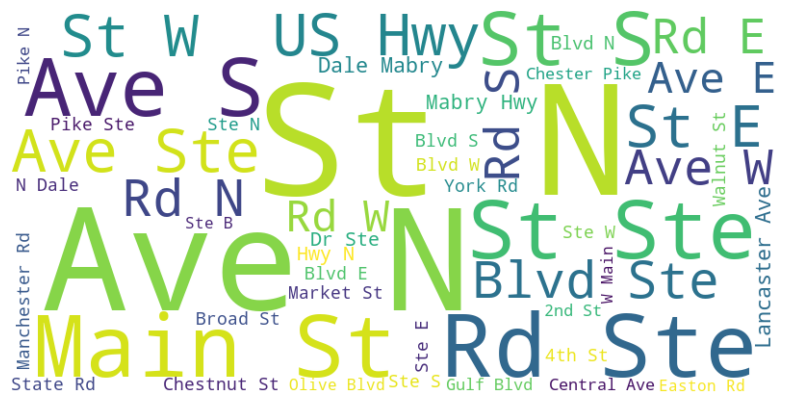

In [218]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

words = ' '.join(left_on['address'].tolist())
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [219]:
from collections import Counter

words = ' '.join(left_on['address'].tolist())

# Count the occurrences of each word
word_freq = Counter(words.split())

# Find the most frequent word
most_frequent_word = [word for word, _ in word_freq.most_common(50)]

print(most_frequent_word)

['St', 'Ave', 'Rd', 'N', 'Ste', 'S', 'Blvd', 'W', 'E', 'Pike', 'Dr', 'Hwy', 'Rd,', 'St,', 'Main', 'US', 'Ave,', 'Blvd,', '19', 'State', 'Dale', 'Lancaster', 'Mabry', '100', 'Dr,', 'Old', 'Ln', 'Park', 'B', 'Market', 'Washington', 'Manchester', 'Pike,', '2nd', '1', '4th', 'Gulf', 'Chestnut', 'South', 'Broad', 'West', 'Walnut', 'Bay', 'Pkwy', 'Ridge', '101', 'Street', 'York', 'A', 'Baltimore']


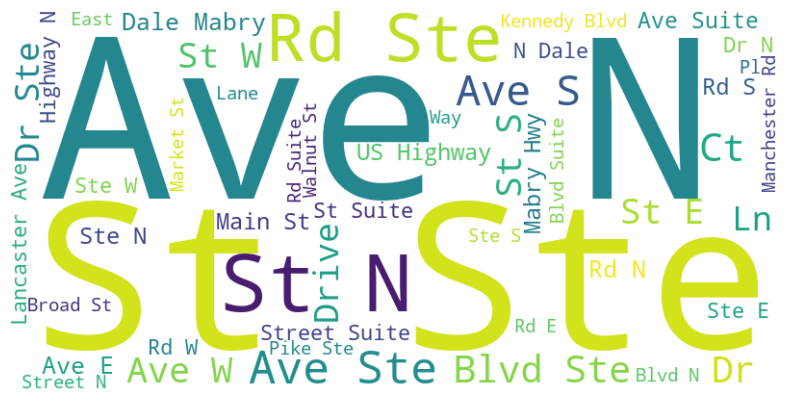

In [220]:
words = ' '.join(right_on['address'].tolist())
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [221]:
words = ' '.join(right_on['address'].tolist())

# Count the occurrences of each word
word_freq = Counter(words.split())

# Find the most frequent word
most_frequent_word = [word for word, _ in word_freq.most_common(50)]

print(most_frequent_word)

['Ave', 'St', 'N', 'AVE', 'Ste', 'Rd', 'ST', 'S', 'W', 'RD', 'E', 'Street', 'Dr', 'DR', 'STE', 'Suite', 'Blvd', 'BLVD', 'Road', 'Avenue', 'Pike', 'Drive', 'SUITE', 'West', 'North', 'STREET', 'PIKE', '19', '100', 'South', 'US', 'N.', 'Ln', '200', 'B', 'East', 'LN', 'Ct', 'CT', 'A', 'S.', 'Hwy', '101', 'Highway', 'W.', '300', '1', 'ROAD', 'Unit', '#']


In [222]:
def preprocess_address(address):
    words = nltk.word_tokenize(address.lower())
    words = [word.replace(".", "") for word in words if word not in string.punctuation]

    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]

    direction_dict = {"n": "north", "s": "south", "w": "west", "e": "east"}
    words = [direction_dict[word] if word in direction_dict else word for word in words]

    abbreviation_dict = {"rd": "road", "ave": "avenue", "ste": "suite", "dr": "drive", "hwy": "highway", "ln": "lane", "ct": "court"}
    words = [abbreviation_dict[word] if word in abbreviation_dict else word for word in words]
    
    return ' '.join(words)

left_on['address'] = left_on['address'].apply(preprocess_address)
right_on['address'] = right_on['address'].apply(preprocess_address)

In [223]:
# 还没考虑到 suite 123 floor 123

In [224]:
right_df.head()

,business_id,name,address,city,state,zip_code,size
0,1,SOURINI PAINTING INC.,12800 44th St N,Clearwater,FL,33762-4726,11.0
1,2,WOLFF DOLLA BILL LLC,1905 E 19th Ave,Tampa,FL,33605-2700,8.0
2,3,"COMPREHENSIVE SURGERY CENTER, LLC","1988 GULF TO BAY BLVD, Ste 1",CLEARWATER,FL,33765-3550,8.0
3,4,FRANK & ADAM APPAREL LLC,13640 Wright Cir,Tampa,FL,33626-3030,12.0
4,5,MORENO PLUS TRANSPORT INC,8608 Huron Court unite 58,Tampa,FL,33614,8.0


In [225]:
right_on.head()

,business_id,name,address,city,state,postal_code
0,1,sourini painting,12800 44th st north,Clearwater,FL,33762
1,2,wolff dolla bill,1905 east 19th avenue,Tampa,FL,33605
2,3,comprehensive surgery center,1988 gulf bay blvd suite 1,Clearwater,FL,33765
3,4,frank adam apparel,13640 wright cir,Tampa,FL,33626
4,5,moreno plus transport,8608 huron court unite 58,Tampa,FL,33614


In [226]:
right_df.tail()

,business_id,name,address,city,state,zip_code,size
91786,91787,DEH TRANSPORT LLC,737 E Statue Ct,Franklin,TN,37067-5637,2.0
91787,91788,TM INC. LLC,4911 Georgia Ave,Nashville,TN,37209-2135,4.0
91788,91789,"PASSION TRANSPORTATION SERVICES, LLC",2005 QUAIL DR,NASHVILLE,TN,37207,2.0
91789,91790,ROSIE CLEANING SERVICE/COMMERCIAL,705 N 9TH ST,NASHVILLE,TN,37206-3907,5.0
91790,91791,THE AQUADUCKS LLC,128 Gordon Ter,Nashville,TN,37207-4534,4.0


In [227]:
right_on.tail()

,business_id,name,address,city,state,postal_code
91786,91787,deh transport,737 east statue court,Franklin,TN,37067
91787,91788,tm,4911 georgia avenue,Nashville,TN,37209
91788,91789,passion transportation services,2005 quail drive,Nashville,TN,37207
91789,91790,rosie cleaning service/commercial,705 north 9th st,Nashville,TN,37206
91790,91791,aquaducks,128 gordon ter,Nashville,TN,37207


In [228]:
print(left_on[left_on['entity_id'] == 15883])
print(right_on[right_on['business_id'] == 11])

       entity_id                              name             address  \
15412      15883  day 's collision painting repair  975 florida avenue   

              city state  postal_code  
15412  Palm Harbor    FL        34683  
    business_id              name             address         city state  \
10           11  day 's collision  975 florida avenue  Palm Harbor    FL   

    postal_code  
10        34683  


In [229]:
print(left_df[left_df['entity_id'] == 15925])
print(right_df[right_df['business_id'] == 2206])

print(left_on[left_on['entity_id'] == 15925])
print(right_on[right_on['business_id'] == 2206])

       entity_id                    name          address   city state  \
15924      15925  Jazz House Supper Club  9331 E Adamo Dr  Tampa    FL   

       postal_code                                         categories  
15924      33619.0  Event Planning & Services, Arts & Entertainmen...  
      business_id                        name                address   city  \
2205         2206  JAZZ HOUSE SUPPER CLUB LLC  9331 East Adamo Drive  Tampa   

     state zip_code  size  
2205    FL    33619  32.0  
       entity_id                    name                address   city state  \
15454      15925  jazz house supper club  9331 east adamo drive  Tampa    FL   

       postal_code  
15454        33619  
      business_id                    name                address   city state  \
2205         2206  jazz house supper club  9331 east adamo drive  Tampa    FL   

      postal_code  
2205        33619  


In [230]:
print(left_df[left_df['entity_id'] == 89855])
print(right_df[right_df['business_id'] == 72])

print(left_on[left_on['entity_id'] == 89855])
print(right_on[right_on['business_id'] == 72])

       entity_id                name                 address   city state  \
89854      89855  Esposito’s Italian  14306 N Dale Mabry Hwy  Tampa    FL   

       postal_code                                        categories  
89854      33618.0  Wine Bars, Restaurants, Bars, Italian, Nightlife  
    business_id             name                       address   city state  \
71           72  ESPOSITO'S 1948  14306 N Dale Mabry Hwy Ste F  Tampa    FL   

      zip_code  size  
71  33618-2052  38.0  
       entity_id                name                         address   city  \
87184      89855  esposito ’ italian  14306 north dale mabry highway  Tampa   

      state  postal_code  
87184    FL        33618  
    business_id              name                                 address  \
71           72  esposito 's 1948  14306 north dale mabry highway suite f   

     city state  postal_code  
71  Tampa    FL        33618  


In [232]:
left_on['postal_code'] = left_on['postal_code'].astype(str)
right_on['postal_code'] = right_on['postal_code'].astype(str)

In [241]:
left_on['left_address'] = left_on['address'] + ' ' + left_on['city'] + ' ' + left_on['state'] + ', ' + left_on['postal_code']
left_on.head()

,entity_id,name,address,city,state,postal_code,left_address
0,1,ups store,87 grasso plaza shopping center,Affton,MO,63123,"87 grasso plaza shopping center Affton MO, 63123"
1,2,st honore pastries,935 race st,Philadelphia,PA,19107,"935 race st Philadelphia PA, 19107"
2,3,perkiomen valley brewery,101 walnut st,Green Lane,PA,18054,"101 walnut st Green Lane PA, 18054"
3,4,sonic drive-in,615 main st,Ashland City,TN,37015,"615 main st Ashland City TN, 37015"
4,5,famous footwear,8522 eager road dierbergs brentwood point,Brentwood,MO,63144,8522 eager road dierbergs brentwood point Bren...


In [242]:
right_on['right_address'] = right_on['address'] + ' ' + right_on['city'] + ' ' + right_on['state'] + ', ' + right_on['postal_code']
right_on.head()

,business_id,name,address,city,state,postal_code,right_address
0,1,sourini painting,12800 44th st north,Clearwater,FL,33762,"12800 44th st north Clearwater FL, 33762"
1,2,wolff dolla bill,1905 east 19th avenue,Tampa,FL,33605,"1905 east 19th avenue Tampa FL, 33605"
2,3,comprehensive surgery center,1988 gulf bay blvd suite 1,Clearwater,FL,33765,"1988 gulf bay blvd suite 1 Clearwater FL, 33765"
3,4,frank adam apparel,13640 wright cir,Tampa,FL,33626,"13640 wright cir Tampa FL, 33626"
4,5,moreno plus transport,8608 huron court unite 58,Tampa,FL,33614,"8608 huron court unite 58 Tampa FL, 33614"


In [260]:
import fuzzymatcher

In [262]:
left_on_extracted = ['entity_id', 'left_address']
right_on_extracted = ['business_id', 'right_address']

matched_results = fuzzymatcher.fuzzy_left_join(left_on,
                                            right_on,
                                            left_on_extracted,
                                            right_on_extracted,
                                            left_id_col='entity_id',
                                            right_id_col='business_id')

In [274]:
cols = [
    "best_match_score", "entity_id", "business_id"
]

matched_results[cols].sort_values(by=['best_match_score'], ascending=False).head(5)

,best_match_score,entity_id,business_id
3656382,1.970217,40352,7611
7604576,1.789084,85119,3341
3383664,1.726116,37369,1807
7497183,1.714464,83839,2676
5357572,1.676432,59605,16108


In [278]:
greater_than_70_percent = matched_results[cols].query("best_match_score >= 0.5")
greater_than_70_percent.count()
len(greater_than_70_percent) / len(matched_results)

0.2415119421199442

In [270]:
matched_results[cols].query("best_match_score >= .60").sort_values(
    by=['best_match_score'], ascending=False).head(50)

,best_match_score,entity_id,business_id
3656382,1.970217,40352,7611
7604576,1.789084,85119,3341
3383664,1.726116,37369,1807
7497183,1.714464,83839,2676
5357572,1.676432,59605,16108
353420,1.657749,3839,17395
5036979,1.620308,55905,6733
8234241,1.618076,92059,20512
1707276,1.580202,18906,18282
4850290,1.580186,53790,23946
